In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import time
import random

In [2]:
# Critere de performance
def compute_pred_score(y_true, y_pred):
    y_pred_unq =  np.unique(y_pred)
    for i in y_pred_unq:
        if((i != -1) & (i!= 1) & (i!= 0) ):
            raise ValueError('The predictions can contain only -1, 1, or 0!')
    y_comp = y_true * y_pred
    score = float(10*np.sum(y_comp == -1) + np.sum(y_comp == 0))
    score /= y_comp.shape[0]
    return score

In [3]:
X_train_fname = '../data/training_templates.csv'
y_train_fname = '../data/training_labels.txt'
X_test_fname  = '../data/testing_templates.csv'
X_train = pd.read_csv(X_train_fname, sep=',', header=None).values
X_test  = pd.read_csv(X_test_fname,  sep=',', header=None).values
y_train = np.loadtxt(y_train_fname, dtype=np.int)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

random.seed(42)

t0 = time()

rf = RandomForestClassifier(oob_score=True)
rf.fit(X_train, y_train)
y_pred_proba = rf.predict_proba(X_train)[:,1]
print "AUC Score (Train): %f" % metrics.roc_auc_score(y_train, y_pred_proba)
print "Done in %0.3fs." % (time()-t0)

AUC Score (Train): 0.999968
Done in 15.808s.


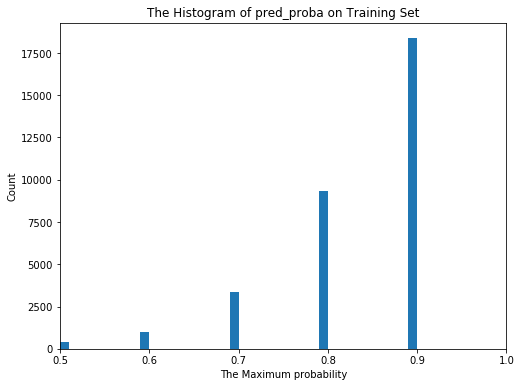

In [13]:
bins = np.arange(0.5, 1.0, 0.01)
plt.figure(1, figsize=(8,6))
plt.hist(y_pred_proba, bins=bins)
plt.title('The Histogram of pred_proba on Training Set')
plt.xlim(0.5, 1)
plt.xlabel('The Maximum probability')
plt.ylabel('Count')
plt.show()

In [15]:
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)
np.savetxt('y_pred_rf.txt', y_pred, fmt='%d')

for i in range(len(y_pred)):
    if max(y_pred_proba[i, :]) < 0.6:
        y_pred[i] = 0
np.savetxt('y_pred_rf_0.6.txt', y_pred, fmt='%d')